# # import Libraries


import pandas as pd
import os
for dirname, _, filenames in os .walk('/ kaggle/input'):
    for filename in filenames:
    
        print(os.path.join(dirname, filename))
        

In [208]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure as fig
import seaborn as sns
from scipy.stats import linregress
from wordcloud import WordCloud,STOPWORDS

# Read the .csv file.

In [210]:
data= pd.read_csv('Saudi Stock Markst.csv')

In [211]:
data.columns

Index(['symbol', 'name', 'trading_name ', 'sectoer', 'date', 'open', 'high',
       'low', 'close', 'change', 'perc_Change', 'volume_traded ',
       'value_traded', 'no_trades '],
      dtype='object')

In [212]:
data.head()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-23,31.8,31.8,31.45,31.60,0.25,0.80,230790.0,7295880.55,507.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-22,30.5,31.4,30.30,31.35,-0.35,-1.10,422695.0,13113020.10,1015.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-21,31.7,32.3,31.30,31.70,-0.75,-2.31,266845.0,8497563.05,668.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-20,32.7,32.9,32.10,32.45,-0.25,-0.76,254463.0,8271461.45,557.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-19,32.5,32.8,32.45,32.70,0.50,1.55,199425.0,6500652.35,498.0


In [213]:
data.tail()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
6987,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2020-03-12,20.20,21.20,20.16,20.70,-1.70,-7.59,1618746.0,33206311.44,2329.0
6988,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2020-03-11,24.50,24.50,21.60,22.40,-1.60,-6.67,1487872.0,33903289.20,2092.0
6989,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2020-03-10,22.98,24.24,22.68,24.00,1.22,5.36,1877511.0,43740461.26,2359.0
6990,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2020-03-09,22.78,23.18,22.78,22.78,-2.52,-9.96,1041240.0,23747279.76,893.0
6991,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2020-03-08,25.30,25.65,25.30,25.30,-2.80,-9.96,1093053.0,27745024.40,771.0


In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6992 entries, 0 to 6991
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symbol          6992 non-null   int64  
 1   name            6992 non-null   object 
 2   trading_name    6992 non-null   object 
 3   sectoer         6992 non-null   object 
 4   date            6992 non-null   object 
 5   open            6830 non-null   float64
 6   high            6830 non-null   float64
 7   low             6830 non-null   float64
 8   close           6992 non-null   float64
 9   change          6992 non-null   float64
 10  perc_Change     6992 non-null   float64
 11  volume_traded   6992 non-null   float64
 12  value_traded    6992 non-null   float64
 13  no_trades       6992 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 764.9+ KB


In [215]:
data.mean()

symbol            4.113915e+03
open              2.465972e+01
high              2.518237e+01
low               2.419611e+01
close             2.432847e+01
change           -8.979834e-02
perc_Change      -3.362300e-01
volume_traded     1.136108e+06
value_traded      2.358603e+07
no_trades         1.076636e+03
dtype: float64

In [216]:
data.shape

(6992, 14)

In [217]:
data.sample(10)

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
431,2001,Methanol Chemicals Co.,CHEMANOL,Materials,2020-04-08,6.82,6.83,6.71,6.80,-0.01,-0.15,1339293.0,9074159.50,978.0
5725,8312,Alinma Tokio Marine Co.,ALINMA TOKIO M,Financials,2020-03-17,9.55,9.77,9.16,9.69,0.12,1.25,1325283.0,12710939.09,1231.0
5165,8160,Arabia Insurance Cooperative Co.,AICC,Financials,2020-03-17,9.44,9.62,9.28,9.51,0.06,0.63,755763.0,7137651.70,628.0
2205,4031,Saudi Ground Services Co.,SGS,Industrials,2020-04-23,22.16,23.08,22.16,23.00,1.00,4.55,1498204.0,34119145.38,1798.0
1569,3080,Eastern Province Cement Co.,EPCCO,Materials,2020-03-15,25.65,27.00,24.84,24.90,-0.60,-2.35,232487.0,5743081.60,251.0
4802,8050,Salama Cooperative Insurance Co.,SALAMA,Financials,2020-04-05,11.12,11.14,10.88,10.88,-0.12,-1.09,196037.0,2151923.46,316.0
4115,1010,Riyad Bank,RIBL,Financials,2020-03-17,14.28,14.86,14.22,14.74,0.50,3.51,4013561.0,58761587.96,3198.0
6334,4339,Derayah REIT Fund,DERAYAH REIT,Real Estate,2020-04-14,9.64,9.74,9.64,9.66,0.13,1.36,263436.0,2555981.04,301.0
5759,7200,Al Moammar Information Systems Co.,MIS,Information Technology,2020-03-18,41.00,42.60,40.60,41.00,-0.40,-0.97,308930.0,12881641.80,769.0
6652,4090,Taiba Investments Co.,TAIBA,Real Estate,2020-04-09,25.15,25.40,25.10,25.20,0.15,0.60,148912.0,3768018.35,357.0


In [218]:
data.isna()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6988,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6989,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6990,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Read the second .csv file

In [219]:
df= pd.read_csv('tadawul_stcks.csv')

In [220]:
df

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-05,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,1.539907e+07,804.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-04,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,2.598139e+07,1268.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-03,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,1.711641e+07,854.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-02,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,2.585870e+07,1242.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-01,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,2.574797e+07,1625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593814,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-28,22.90,22.90,21.62,22.50,0.00,0.00,1860532.0,4.149566e+07,2023.0
593815,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-27,23.30,23.32,22.24,22.50,-0.84,-3.60,4905676.0,1.114168e+08,3259.0
593816,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-26,24.60,24.60,23.30,23.34,-1.16,-4.73,3908215.0,9.269862e+07,2672.0
593817,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-23,24.80,25.00,24.34,24.50,-0.50,-2.00,4078214.0,1.002221e+08,5571.0


In [221]:
df.columns

Index(['symbol', 'name', 'trading_name ', 'sectoer', 'date', 'open', 'high',
       'low', 'close', 'change', 'perc_Change', 'volume_traded ',
       'value_traded', 'no_trades '],
      dtype='object')

In [222]:
df.head()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-05,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,15399073.50,804.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-04,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,25981391.35,1268.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-03,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,17116413.40,854.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-02,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,25858700.60,1242.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-01,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,25747967.55,1625.0


In [223]:
df.tail()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
593814,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-28,22.9,22.90,21.62,22.50,0.00,0.00,1860532.0,4.149566e+07,2023.0
593815,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-27,23.3,23.32,22.24,22.50,-0.84,-3.60,4905676.0,1.114168e+08,3259.0
593816,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-26,24.6,24.60,23.30,23.34,-1.16,-4.73,3908215.0,9.269862e+07,2672.0
593817,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-23,24.8,25.00,24.34,24.50,-0.50,-2.00,4078214.0,1.002221e+08,5571.0
593818,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-22,26.0,26.10,23.60,25.00,-1.00,-3.85,14220388.0,3.502633e+08,7183.0


# dropping passed values

In [ ]:
data = data.drop(data.columns[[0, 1,11, 12,13]], axis=1)  # data.columns is zero-based pd.Index
  

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6992 entries, 0 to 6991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   trading_name   6992 non-null   object 
 1   sectoer        6992 non-null   object 
 2   date           6992 non-null   object 
 3   open           6830 non-null   float64
 4   high           6830 non-null   float64
 5   low            6830 non-null   float64
 6   close          6992 non-null   float64
 7   change         6992 non-null   float64
 8   perc_Change    6992 non-null   float64
dtypes: float64(6), object(3)
memory usage: 491.8+ KB


In [226]:
df = df.drop(df.columns[[0, 1,11 ,12,13]], axis=1)  

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593819 entries, 0 to 593818
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trading_name   593819 non-null  object 
 1   sectoer        593819 non-null  object 
 2   date           593819 non-null  object 
 3   open           587364 non-null  float64
 4   high           587122 non-null  float64
 5   low            587122 non-null  float64
 6   close          593819 non-null  float64
 7   change         593819 non-null  float64
 8   perc_Change    593819 non-null  float64
dtypes: float64(6), object(3)
memory usage: 40.8+ MB


# merge both of dataset

In [228]:
dr = pd.merge(data, df, how = 'outer')

In [229]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600571 entries, 0 to 600570
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trading_name   600571 non-null  object 
 1   sectoer        600571 non-null  object 
 2   date           600571 non-null  object 
 3   open           593954 non-null  float64
 4   high           593712 non-null  float64
 5   low            593712 non-null  float64
 6   close          600571 non-null  float64
 7   change         600571 non-null  float64
 8   perc_Change    600571 non-null  float64
dtypes: float64(6), object(3)
memory usage: 45.8+ MB


In [230]:
dr.isna()

,trading_name,sectoer,date,open,high,low,close,change,perc_Change
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
600566,False,False,False,False,False,False,False,False,False
600567,False,False,False,False,False,False,False,False,False
600568,False,False,False,False,False,False,False,False,False
600569,False,False,False,False,False,False,False,False,False


In [231]:
dr['year']=pd.DatetimeIndex(dr['date']).year

In [232]:
dr.head()

,trading_name,sectoer,date,open,high,low,close,change,perc_Change,year
0,SARCO,Energy,2020-04-23,31.8,31.8,31.45,31.60,0.25,0.80,2020
1,SARCO,Energy,2020-04-22,30.5,31.4,30.30,31.35,-0.35,-1.10,2020
2,SARCO,Energy,2020-04-21,31.7,32.3,31.30,31.70,-0.75,-2.31,2020
3,SARCO,Energy,2020-04-20,32.7,32.9,32.10,32.45,-0.25,-0.76,2020
4,SARCO,Energy,2020-04-19,32.5,32.8,32.45,32.70,0.50,1.55,2020


In [233]:
dr.sample(5)

,trading_name,sectoer,date,open,high,low,close,change,perc_Change,year
115769,HCC,Materials,2014-05-01,25.00,25.4,24.9,25.17,0.20,0.80,2014
194427,ALBABTAIN,Industrials,2010-01-12,36.50,36.5,35.9,35.90,-0.60,-1.64,2010
138987,QACCO,Materials,2019-12-12,67.60,67.9,67.0,67.00,-1.00,-1.47,2019
272617,SRMG,Communication Services,2012-04-01,24.65,25.3,24.6,25.10,0.25,1.01,2012
99980,YANSAB,Materials,2010-09-04,35.70,37.4,35.7,37.20,2.20,6.29,2010


In [234]:
dr.sectoer.unique()

array(['Energy', 'Materials', 'Industrials', 'Consumer Discretionary',
       'Communication Services', 'Consumer Staples', 'Health Care',
       'Financials', 'Information Technology', 'Utilities', 'Real Estate'],
      dtype=object)

# Data Visualization

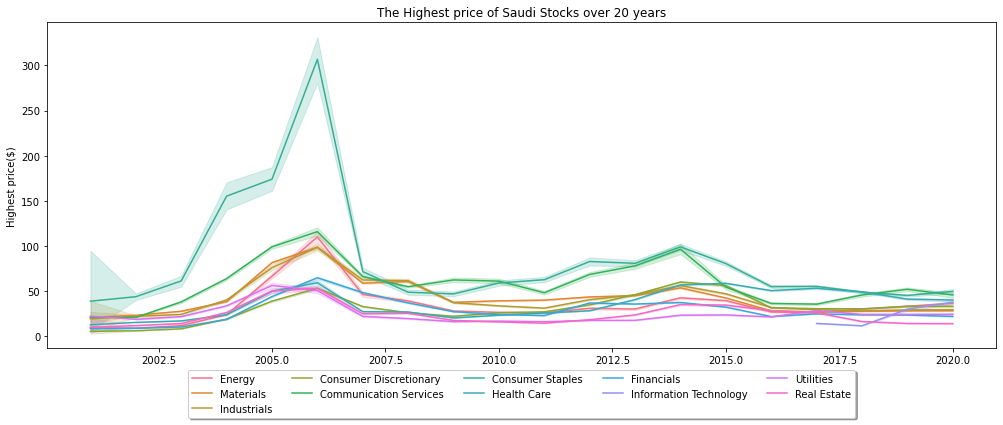

In [235]:
plt.figure(figsize=(17, 6))
sns.lineplot(x="year", y="high", hue="sectoer", markers=True, data=dr)
plt.title('The Highest price of Saudi Stocks over 20 years')
plt.ylabel('Highest price($)')
plt.xlabel('Year')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.grid(False)
plt.show()

In [236]:
dr.shape

(600571, 10)

In [237]:
dr.shape

(600571, 10)

In [238]:
dr['year']=pd.DatetimeIndex(dr['date']).year

In [239]:
dr.columns

Index(['trading_name ', 'sectoer', 'date', 'open', 'high', 'low', 'close',
       'change', 'perc_Change', 'year'],
      dtype='object')

In [240]:
dr = dr.sort_values(by= ["trading_name ","year", "high"], ascending=False)

In [241]:
dr_yearly= dr.groupby(["trading_name ","year" ], as_index= False).first()

In [242]:
dr_yearly[dr_yearly.year.between(2019,2020)]

,trading_name,year,sectoer,date,open,high,low,close,change,perc_Change
11,A.OTHAIM MARKET,2019,Consumer Staples,2019-07-16,85.00,86.40,85.00,85.90,1.40,1.66
12,A.OTHAIM MARKET,2020,Consumer Staples,2020-04-07,97.80,102.80,97.80,101.40,3.60,3.68
15,ABO MOATI,2019,Consumer Discretionary,2019-11-13,28.95,28.95,23.72,23.72,-2.63,-9.98
16,ABO MOATI,2020,Consumer Discretionary,2020-01-01,19.34,19.36,18.80,18.96,-0.22,-1.15
35,ACC,2019,Materials,2019-12-09,37.80,39.30,37.80,38.00,-0.05,-0.13
...,...,...,...,...,...,...,...,...,...,...
2578,ZAIN KSA,2020,Communication Services,2020-02-05,13.20,13.28,12.74,12.74,-0.36,-2.75
2596,ZAMIL INDUST,2019,Materials,2019-03-18,19.42,19.70,19.40,19.68,0.26,1.34
2597,ZAMIL INDUST,2020,Materials,2020-02-06,21.78,22.10,21.30,21.60,-0.10,-0.46
2616,ZOUJAJ,2019,Materials,2019-04-15,19.44,19.46,19.20,19.34,0.04,0.21


# Checking the effects of COVID-19 on the saudi healthcare stock prices

In [243]:
dr_19_20 = dr_yearly[dr_yearly.year.between(2019,2020)].copy()

In [244]:
dr_19_20["change_yearly"] = dr_19_20.groupby(["trading_name "])["high"].diff()

In [245]:
dr_19_20

,trading_name,year,sectoer,date,open,high,low,close,change,perc_Change,change_yearly
11,A.OTHAIM MARKET,2019,Consumer Staples,2019-07-16,85.00,86.40,85.00,85.90,1.40,1.66,NaN
12,A.OTHAIM MARKET,2020,Consumer Staples,2020-04-07,97.80,102.80,97.80,101.40,3.60,3.68,16.40
15,ABO MOATI,2019,Consumer Discretionary,2019-11-13,28.95,28.95,23.72,23.72,-2.63,-9.98,NaN
16,ABO MOATI,2020,Consumer Discretionary,2020-01-01,19.34,19.36,18.80,18.96,-0.22,-1.15,-9.59
35,ACC,2019,Materials,2019-12-09,37.80,39.30,37.80,38.00,-0.05,-0.13,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2578,ZAIN KSA,2020,Communication Services,2020-02-05,13.20,13.28,12.74,12.74,-0.36,-2.75,-1.18
2596,ZAMIL INDUST,2019,Materials,2019-03-18,19.42,19.70,19.40,19.68,0.26,1.34,NaN
2597,ZAMIL INDUST,2020,Materials,2020-02-06,21.78,22.10,21.30,21.60,-0.10,-0.46,2.40
2616,ZOUJAJ,2019,Materials,2019-04-15,19.44,19.46,19.20,19.34,0.04,0.21,NaN


In [246]:
dr_19_20.describe()

,year,open,high,low,close,change,perc_Change,change_yearly
count,399.000000,393.000000,393.00000,393.000000,399.000000,399.000000,399.000000,195.000000
mean,2019.501253,33.685674,34.54916,33.097557,33.267820,0.144261,0.637820,-1.746154
std,0.500626,29.985409,30.59548,29.286548,29.584354,1.072730,2.424048,7.440761
min,2019.000000,7.150000,7.42000,7.100000,5.390000,-6.900000,-9.980000,-34.000000
25%,2019.000000,14.480000,14.88000,14.360000,14.120000,-0.090000,-0.430000,-4.005000
50%,2020.000000,23.100000,24.40000,22.860000,22.900000,0.100000,0.520000,-0.620000
75%,2020.000000,39.300000,40.20000,38.500000,38.800000,0.500000,1.815000,1.610000
max,2020.000000,194.000000,195.20000,183.010000,183.530000,3.600000,11.430000,29.300000


In [247]:
dr_19_20

,trading_name,year,sectoer,date,open,high,low,close,change,perc_Change,change_yearly
11,A.OTHAIM MARKET,2019,Consumer Staples,2019-07-16,85.00,86.40,85.00,85.90,1.40,1.66,NaN
12,A.OTHAIM MARKET,2020,Consumer Staples,2020-04-07,97.80,102.80,97.80,101.40,3.60,3.68,16.40
15,ABO MOATI,2019,Consumer Discretionary,2019-11-13,28.95,28.95,23.72,23.72,-2.63,-9.98,NaN
16,ABO MOATI,2020,Consumer Discretionary,2020-01-01,19.34,19.36,18.80,18.96,-0.22,-1.15,-9.59
35,ACC,2019,Materials,2019-12-09,37.80,39.30,37.80,38.00,-0.05,-0.13,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2578,ZAIN KSA,2020,Communication Services,2020-02-05,13.20,13.28,12.74,12.74,-0.36,-2.75,-1.18
2596,ZAMIL INDUST,2019,Materials,2019-03-18,19.42,19.70,19.40,19.68,0.26,1.34,NaN
2597,ZAMIL INDUST,2020,Materials,2020-02-06,21.78,22.10,21.30,21.60,-0.10,-0.46,2.40
2616,ZOUJAJ,2019,Materials,2019-04-15,19.44,19.46,19.20,19.34,0.04,0.21,NaN


In [248]:
low_company = dr_19_20.dropna().sort_values(by="change_yearly").head(5)["trading_name " ].values.tolist()

In [249]:
high_company = dr_19_20.dropna().sort_values(by="change_yearly", ascending =False).head(5)["trading_name " ].values.tolist()

In [250]:
low_company

['SABIC', 'SACO', 'SFICO', 'SIECO', 'SRMG']

In [251]:
high_company

['SHARQIYAH DEV', 'SADAFCO', 'A.OTHAIM MARKET', 'DUR', 'EXTRA']

In [252]:
interest_company = low_company + high_company

In [253]:
interest_dr = dr_yearly[dr_yearly["trading_name "].isin(low_company)]

<AxesSubplot:title={'center':'The Lowest Companies Between 2019 to 2020 '}, xlabel='year', ylabel='low'>

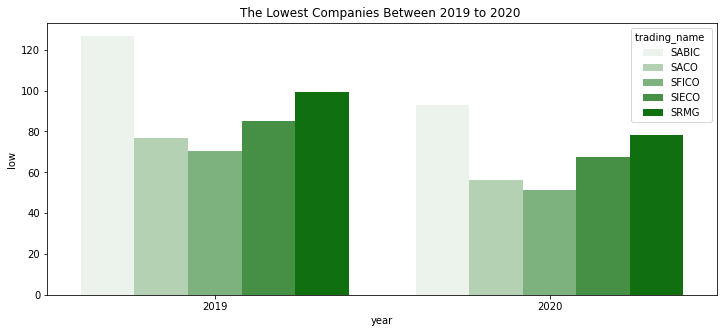

In [254]:
plt.figure(figsize = [12,5])
plt.title('The Lowest Companies Between 2019 to 2020 ');
sns.barplot(data =interest_dr[interest_dr.year.between(2019,2020)], x="year", y="low",hue="trading_name ", color='green')

In [255]:
interest_dr = dr_yearly[dr_yearly["trading_name "].isin(high_company)]

<AxesSubplot:title={'center':'The highst Companies Between 2019 to 2020 '}, xlabel='year', ylabel='high'>

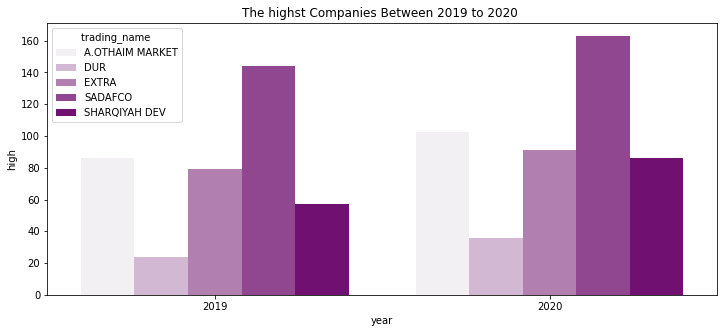

In [256]:
plt.figure(figsize = [12,5])
plt.title('The highst Companies Between 2019 to 2020 ');
sns.barplot(data =interest_dr[interest_dr.year.between(2019,2020)], x="year", y="high",hue="trading_name ", color='purple')

In [257]:
dr

,trading_name,sectoer,date,open,high,low,close,change,perc_Change,year
61958,ZOUJAJ,Materials,2020-01-22,18.40,18.84,18.40,18.54,0.20,1.09,2020
61959,ZOUJAJ,Materials,2020-01-21,18.52,18.56,18.30,18.34,-0.18,-0.97,2020
61957,ZOUJAJ,Materials,2020-01-23,18.54,18.54,18.32,18.32,-0.22,-1.19,2020
61960,ZOUJAJ,Materials,2020-01-20,18.34,18.54,18.24,18.52,0.24,1.31,2020
61956,ZOUJAJ,Materials,2020-01-26,18.34,18.40,18.28,18.30,-0.02,-0.11,2020
...,...,...,...,...,...,...,...,...,...,...
296369,A.OTHAIM MARKET,Consumer Staples,2008-10-15,6.90,7.08,6.65,6.90,-0.45,-6.12,2008
296373,A.OTHAIM MARKET,Consumer Staples,2008-10-11,6.65,7.08,6.60,6.60,-0.73,-9.96,2008
296363,A.OTHAIM MARKET,Consumer Staples,2008-10-25,6.78,6.90,6.75,6.75,-0.75,-10.00,2008
296372,A.OTHAIM MARKET,Consumer Staples,2008-10-12,6.70,6.75,5.98,6.10,-0.50,-7.58,2008


In [258]:
dr[dr.year.between(2019,2020)].sort_values(by= ["trading_name ", "high"], ascending = False)

,trading_name,sectoer,date,open,high,low,close,change,perc_Change,year
62149,ZOUJAJ,Materials,2019-04-15,19.44,19.46,19.20,19.34,0.04,0.21,2019
62150,ZOUJAJ,Materials,2019-04-14,19.36,19.40,19.26,19.30,-0.04,-0.21,2019
62151,ZOUJAJ,Materials,2019-04-11,19.16,19.38,19.10,19.34,0.26,1.36,2019
62152,ZOUJAJ,Materials,2019-04-10,18.80,19.08,18.80,19.08,0.56,3.02,2019
62174,ZOUJAJ,Materials,2019-03-11,18.70,19.00,18.60,18.60,0.00,0.00,2019
...,...,...,...,...,...,...,...,...,...,...
293787,A.OTHAIM MARKET,Consumer Staples,2019-02-20,66.20,66.80,66.20,66.80,0.60,0.91,2019
293783,A.OTHAIM MARKET,Consumer Staples,2019-02-26,66.00,66.60,66.00,66.50,0.40,0.61,2019
293782,A.OTHAIM MARKET,Consumer Staples,2019-02-27,66.20,66.50,65.70,66.50,0.00,0.00,2019
293784,A.OTHAIM MARKET,Consumer Staples,2019-02-25,66.20,66.50,65.50,66.10,-0.10,-0.15,2019


<AxesSubplot:title={'center':'Top Sectors Between 2019 to 2020 '}, xlabel='year', ylabel='high'>

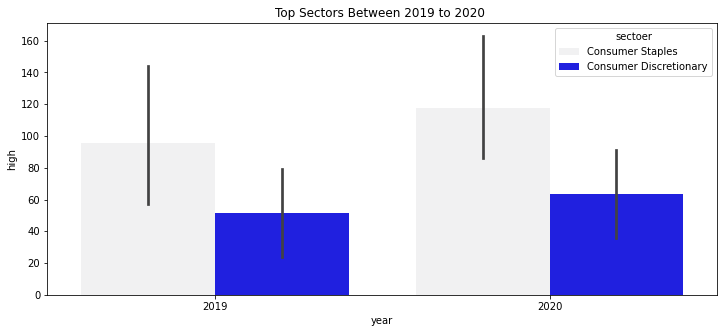

In [259]:
plt.figure(figsize = [12,5])
plt.title('Top Sectors Between 2019 to 2020 ');
sns.barplot(data =interest_dr[interest_dr.year.between(2019,2020)], x="year", y="high",hue="sectoer", color="blue")

In [260]:
 #Checking the effects of COVID-19 on the saudi healthcare stock prices

In [261]:
#Q3 part b health care corona
dr[dr['sectoer']=='Health Care']['trading_name '].unique()
health_care = dr[dr['sectoer']=='Health Care']
health_care['date']= pd.to_datetime(health_care['date'])
health_care['date']= health_care['date'].dt.year == 2020
health_care.drop(health_care[health_care['date'] == False].index, inplace=True)
health_care.sort_values('date', inplace=True)
health_care = health_care.set_index('date')
health_care.head()

<ipython-input-261-78a5749cfe2f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_care['date']= pd.to_datetime(health_care['date'])
<ipython-input-261-78a5749cfe2f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_care['date']= health_care['date'].dt.year == 2020
C:\Users\miss-\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,trading_name,sectoer,open,high,low,close,change,perc_Change,year
date,,,,,,,,,
True,SULAIMAN ALHABIB,Health Care,55.80,59.60,55.00,55.10,0.10,0.18,2020
True,CHEMICAL,Health Care,22.90,22.90,22.64,22.68,-0.28,-1.22,2020
True,CHEMICAL,Health Care,22.68,22.84,22.30,22.30,-0.26,-1.15,2020
True,CHEMICAL,Health Care,22.30,22.56,22.26,22.56,0.00,0.00,2020
True,CHEMICAL,Health Care,22.04,22.56,22.04,22.56,0.66,3.01,2020


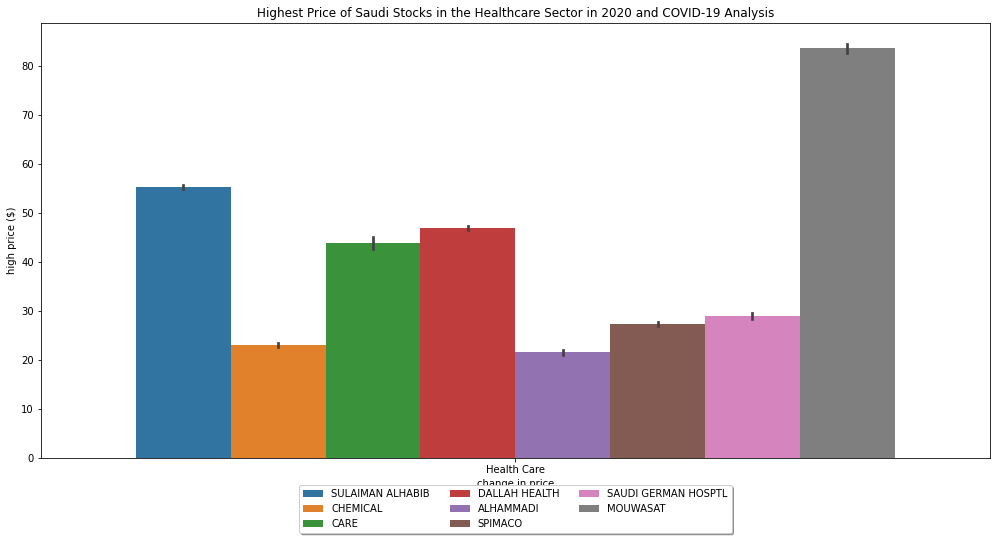

In [281]:
plt.figure(figsize=(17, 8))
sns.barplot(x="sectoer", y="high", hue="trading_name ", data=health_care)
plt.title('Highest Price of Saudi Stocks in the Healthcare Sector in 2020 and COVID-19 Analysis')
plt.ylabel('high price ($)')
plt.xlabel('change in price')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3)
plt.grid(False)
Twinx=True

plt.show()

In [272]:
#Moving average
def sma(data, n):
    sma = data.rolling(window = n).mean()
    return pd.DataFrame(sma)
#let take moving average of trading companies 'SARCO' and 'SAUDI ARAMCO'
#Sarco
Sarco_df = dr[dr['trading_name ']=='SARCO']
Sarco_df['date']= pd.to_datetime(dr['date'])
Sarco_df.sort_values('date', inplace=True)
Sarco_df = Sarco_df.set_index('date')

n = [20, 50]
for i in n:
    Sarco_df[f'sma_{i}'] = sma(Sarco_df['close'], i)
    
Sarco_df.tail()

<ipython-input-272-8eb9565c179f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sarco_df['date']= pd.to_datetime(dr['date'])
<ipython-input-272-8eb9565c179f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sarco_df.sort_values('date', inplace=True)


,trading_name,sectoer,open,high,low,close,change,perc_Change,year,sma_20,sma_50
date,,,,,,,,,,,
2020-04-19,SARCO,Energy,32.5,32.8,32.45,32.70,0.50,1.55,2020,32.0025,33.923
2020-04-20,SARCO,Energy,32.7,32.9,32.10,32.45,-0.25,-0.76,2020,32.2075,33.582
2020-04-21,SARCO,Energy,31.7,32.3,31.30,31.70,-0.75,-2.31,2020,32.3300,33.226
2020-04-22,SARCO,Energy,30.5,31.4,30.30,31.35,-0.35,-1.10,2020,32.4575,32.962
2020-04-23,SARCO,Energy,31.8,31.8,31.45,31.60,0.25,0.80,2020,32.5750,32.792


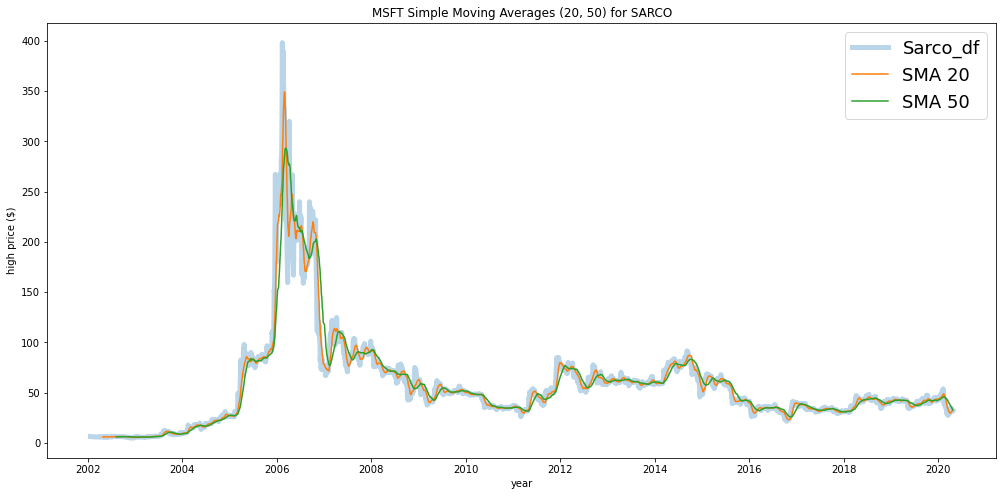

In [279]:
plt.figure(figsize=(17, 8))
plt.plot(Sarco_df['close'], label = 'Sarco_df', linewidth = 5, alpha = 0.3)
plt.plot(Sarco_df['sma_20'], label = 'SMA 20')
plt.plot(Sarco_df['sma_50'], label = 'SMA 50')
plt.title('MSFT Simple Moving Averages (20, 50) for SARCO')
plt.ylabel('high price ($)')
plt.xlabel('year')
plt.legend(loc='upper right', fontsize=18)
plt.show()

In [137]:
dr[["trading_name ", "high"]].groupby("trading_name ", as_index=False)()

TypeError: 'DataFrameGroupBy' object is not callable

In [49]:
ss=dr.groupby(
    [dr.year.between(2019, 2020),
     'trading_name ',dr.year]

)['high'].agg(
    [('high', 'max')]

).loc[True]

In [50]:
ss.head(10)

high
trading_name    year        
A.OTHAIM MARKET 2019   86.40
                2020  102.80
ABO MOATI       2019   28.95
                2020   19.36
ACC             2019   39.30
                2020   40.30
ACIG            2019   24.58
                2020   22.28
ADC             2019   12.00
                2020   13.18

In [84]:
ss.reset_index(inplace=True)

In [93]:
tops=ss.head(10)

In [94]:
tops

,trading_name,year,high
0,A.OTHAIM MARKET,2019,86.40
1,A.OTHAIM MARKET,2020,102.80
2,ABO MOATI,2019,28.95
3,ABO MOATI,2020,19.36
4,ACC,2019,39.30
5,ACC,2020,40.30
6,ACIG,2019,24.58
7,ACIG,2020,22.28
8,ADC,2019,12.00
9,ADC,2020,13.18


In [102]:
tops.year.unique()

array([2019, 2020], dtype=int64)

In [208]:
sns.set(rc={"figure.figsize":(20, 6)}) #width=3, #height=4

<AxesSubplot:xlabel='trading_name ', ylabel='high'>

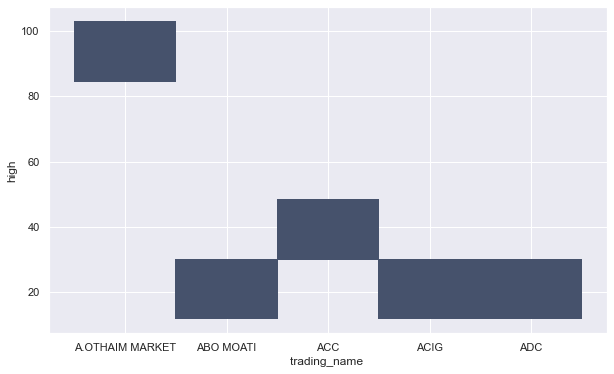

In [116]:
sns.histplot(data=tops, x="trading_name ", y="high")

<AxesSubplot:xlabel='year', ylabel='high'>

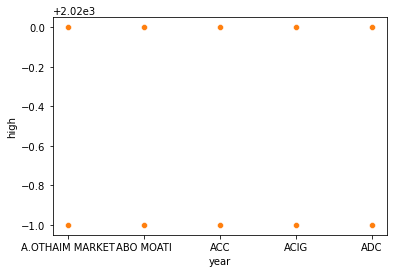

In [97]:
sns.scatterplot(x='year',y='high', data=tops)
sns.scatterplot(x='trading_name ',y='year', data=tops)

In [94]:
ss=dr.groupby(
    [dr.year.between(2019, 2020),
     'trading_name ',dr.year]

)['high'].agg(
    [('high', 'min')]

).loc[True]

In [95]:
ss.tail(10)

high
trading_name  year       
YCC           2019  23.26
              2020  23.20
YSCC          2019  12.86
              2020  16.30
ZAIN KSA      2019   8.23
              2020   8.71
ZAMIL INDUST  2019  14.98
              2020  12.92
ZOUJAJ        2019  16.24
              2020  13.00

In [96]:
ss

high
trading_name    year       
A.OTHAIM MARKET 2019  66.50
                2020  75.60
ABO MOATI       2019   9.58
                2020  12.28
ACC             2019  21.50
...                     ...
ZAIN KSA        2020   8.71
ZAMIL INDUST    2019  14.98
                2020  12.92
ZOUJAJ          2019  16.24
                2020  13.00

[399 rows x 1 columns]

In [97]:
ss

high
trading_name    year       
A.OTHAIM MARKET 2019  66.50
                2020  75.60
ABO MOATI       2019   9.58
                2020  12.28
ACC             2019  21.50
...                     ...
ZAIN KSA        2020   8.71
ZAMIL INDUST    2019  14.98
                2020  12.92
ZOUJAJ          2019  16.24
                2020  13.00

[399 rows x 1 columns]

In [99]:
ss.shape

(399, 1)

In [102]:
b = dr['year'].unique()

In [87]:
b

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001], dtype=int64)